# Project: Investigate Titanic Dataset

This notebook is a companion to the project [Investigate a Dataset](https://classroom.udacity.com/nanodegrees/nd002-cn-basic/parts/fc807c93-f9ac-4063-aece-a40826b57b16/modules/12f2744b-68c6-457a-9707-f3085633d701/lessons/3176718735239847/concepts/53862192490923). The notebook aims to walk through a typical data analysis workflow for solving problems.

## Table of Contents
<ul>
<li><a href="#INTRODUCTION">Introduction</a></li>
<li><a href="#WRANGLING-PHASE">Wrangling Phase</a></li>
<li><a href="#EXPLORATORY-PHASE">Exploratory Phase</a></li>
<li><a href="#CONCLUSIONS">Conclusion</a></li>
</ul>

---

## INTRODUCTION
We will go through 

1. <a href="#Familiarize-with-the-dataset">Familiarize with the dataset</a>
2. <a href="#Research-questions">Research questions</a>

Before thinking about any questions to ask, let's first make sure be familiarize with this dataset. From [the description page in Kaggle](https://www.kaggle.com/c/titanic), Titanic Dataset: 

> Contains demographics and passenger information from 891 of the 2224 passengers and crew on board the Titanic. You can view a description of this dataset on the Kaggle website, where the data was obtained.

Here are the highlights to note:

* On April 15, 1912, during her maiden voyage, the Titanic sank after colliding with an iceberg, killing 1502 out of 2224.
* One of the reasons that the shipwreck led to such loss of life was that there were not enough lifeboats for the passengers and crew.
* Although there was some element of luck involved in surviving the sinking, *some groups of people were more likely to survive than others*, such as women, children, and the upper-class.

Now we have just developed some early understandings about *the domain of our problem*.

### Familiarize with the dataset


In [1]:
# Data analysis and wrangling
import numpy as np
import pandas as pd

# Visualizations
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# Acquire and load in the data
filename = 'titanic-data.csv'
titanic_df = pd.read_csv(filename)

print(titanic_df.columns.values)

['PassengerId' 'Survived' 'Pclass' 'Name' 'Sex' 'Age' 'SibSp' 'Parch'
 'Ticket' 'Fare' 'Cabin' 'Embarked']


#### Take a sneak peak into data

In [3]:
# Print out a few lines from head
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
# Print out a few lines from tail
titanic_df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [5]:
# Describe data of numerical data types
titanic_df.describe(include=[np.number])

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Based on this description of numerical features in dataset:
* Total samples are 891 or 40% of the actual number of passengers on board the Titanic (2,224).
* `Survived` is a categorical feature with 0 or 1 values, and around 38% samples survived representative of the actual survival rate at 32%.
* At least half of passengers (> 50%) did not travel with families.
* Most passengers (> 75%) did not travel with parents or children.
* At lease half of passengers (> 50%) are young (< 30), and they are not upper class (> 75% are 2nd or 3rd ticket class).
* Fares varied significantly, the top 5% passengers pay fares way more than the rest 95%.
* Few elderly passengers (< 1%) within age range 65-80.

In [6]:
# Describe data of categorical data types
titanic_df.describe(include=[np.object])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Sjostedt, Mr. Ernst Adolf",male,1601,B96 B98,S
freq,1,577,7,4,644


Based on this description of categorical features in dataset:
* `Names` are unique across the dataset (count=unique=891)
* `Sex` variable as two possible values with 65% male (top=male, 577/891=0.65)
* `Ticket` (22%) and `Cabin` values has several duplicates across samples.
    * Alternatively, several passengers shared a cabin.
* `Embarked` takes 3 possible values. S port used by most passengers.

#### Variables in dataset

[The Kaggle website](https://www.kaggle.com/c/titanic/data) provides descriptions of all data variables. The dataset not only contains demographics and passenger information, but also survival status.

|Variable|Definition|Key|
|:---|:---|:---|
|survival|Survival|0 = No, 1 = Yes|
|pclass|Ticket class|1 = 1st, 2 = 2nd, 3 = 3rd|
|sex|Sex||
|Age|Age in years||
|sibsp|# of siblings / spouses aboard the Titanic||
|parch|# of parents / children aboard the Titanic||
|ticket|Ticket number||
|fare|Passenger fare||
|cabin|Cabin number||
|embarked|Port of Embarkation|C = Cherbourg, Q = Queenstown, S = Southampton|

Inspired by some of Kaggles' data solutions ([here](https://www.kaggle.com/startupsci/titanic-data-science-solutions)'s one), it's helpful to discern the characteristics of data variables. Be noted that we won't analyze string variables that describing unique id, like `PassengerID`, `Ticket`, and `Cabin`.

There're two data types here: categorical and numerical. Categorical variables is mostly qualitative, while numerical variables is mostly quantitative and continuous. Let's categorize variables by these two types:

|scales of measurements|variables|
|:---|:---|
|Categorical - *Nominal*|`Pclass`, `Embarked`|
|Categorical - *Dichotomous* (also part of nominal)|`Survived`, `Sex`|
|Numerical - *Continuous* (linear, Interval)| `Age`, `Fare`|
|Numerical - *Discrete*|`SibSp`, `Parch`|

### Research questions

#### *What factors made people more likely to survive?*
* And justify your statement.

Though it's a *Non-experimental research*, the primary purpose that we probe the titanic dataset is to find out what factors made people more likely to survive.

|dtypes|Variables|
|:---|:---|
|Dependent variables|Survival status of each passenger|
|Independent variables|features that affect passengers' survival status, like `Sex`, `Pclass`, `Age`, `Parch`, `SibSp`, `Embarked`|
---

## WRANGLING PHASE
- Fixing Data Types
- Problems in the Data and Investigate the Data
- Dig Into Features
- Working With Missing Data
- Some minor issues

### Fixing Data Types

In [7]:
# Change some features' names to make them easier to interpret.
titanic_df.rename(columns={'Sex': 'Gender', 'SibSp': 'Sib_Sp','Parch': 'Par_Ch'}, inplace=True)

# Print out every dtypes of the data set and see if they are all logically correct?
print(titanic_df.dtypes)

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Gender          object
Age            float64
Sib_Sp           int64
Par_Ch           int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object


Based on dtypes print out above, 7 features are integer or floats, and 5 features are strings (object).

* I was considering of taking `Survived` data and convert them into boolean at first. But it might not be necessary since the value in this column is either '0' or '1', which means the same thing to boolean types.

* Also, it is more convenient to keep `PassengerId` and `Pclass` to be int64 but not string here. Because you can sort int64 type of data in order.

### Problems in the Data and Investigate the Data

In [8]:
def data_checkup_result(pd_data, check_unique=False):
    """Check empty data and uniqueness in specific 1D data of pandas data format
    
    This method does 2 things:
    (1) whether a given dataset has empty data;
    (2) whetherall data are unique in this dataset;
    then print out the result.
    
    Args:
        pd_data (Series/DataFrame - Column/Row): a pandas series or a column/row of pandas Dataframe.
        check_unique (bool, optional): A boolean to specify to True if you want check 
            uniqueness of data in dataset. Defaults to False.
    
    Return:
        A bool value. True for the operation successfully done, False otherwise.
    
    Raises:
        Nothing
        
    Examples:
        >>> data_checkup_result(titanic_df['PassengerId'], True)
        For 'PassengerId' column, all data is unique. And there's no empty values in this column.
        >>> data_checkup_result(titanic_df['Survived'])
        For 'Survived' column, There's no empty values in this column.
    """
    if check_unique:
        s1 = "For '%s' column, all data is unique. "% (pd_data.name) if ((len(pd_data.unique()) - pd_data.count()) == 0) \
            else "For '%s' column, there're some duplicate data. "% (pd_data.name)
        s2 = "And there's no empty values in this column." if (pd_data.isnull().sum() == 0) \
            else "And %i empty values in this column." % (pd_data.isnull().sum())
        print(s1 + s2)
    else:
        print("For '%s' column, There's no empty values in this column."% (pd_data.name) if (pd_data.isnull().sum()==0) \
            else "For '%s' column, there're %i empty values." % (pd_data.name, pd_data.isnull().sum()))    
    return True

In [9]:
print(titanic_df.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Gender           0
Age            177
Sib_Sp           0
Par_Ch           0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


`Cabin` and `Age` features are missing quite a lot of data.

In [10]:
for col_name in titanic_df.columns.values:
    if col_name in ['PassengerId', 'Ticket']:
        data_checkup_result(titanic_df[col_name], False)
    else:
        data_checkup_result(titanic_df[col_name])

For 'PassengerId' column, There's no empty values in this column.
For 'Survived' column, There's no empty values in this column.
For 'Pclass' column, There's no empty values in this column.
For 'Name' column, There's no empty values in this column.
For 'Gender' column, There's no empty values in this column.
For 'Age' column, there're 177 empty values.
For 'Sib_Sp' column, There's no empty values in this column.
For 'Par_Ch' column, There's no empty values in this column.
For 'Ticket' column, There's no empty values in this column.
For 'Fare' column, There's no empty values in this column.
For 'Cabin' column, there're 687 empty values.
For 'Embarked' column, there're 2 empty values.


`Cabin` \ `Age` \ `Embarked` features contain a number of null values. These will require correcting.

In [11]:
def get_num_outside_scope(pd_data, scope_list):
    """Check how many data is running out of scope in pd_data

    Retrieves each data in a given dataset, and check if the data is in scope_list.
    Then return the number of data that out of scope.

    Args:
        pd_data (Series/DataFrame - Column/Row): A pandas series or a column/row of pandas Dataframe.
        scope_list (list): A list that specify the scope of data.

    Return:
        An int showing the number of data that out of scope.
    
    Examples:
        >>> get_num_outside_scope(titanic_df['Survived'], [0,1])
        0
    """
    i = 0
    for data in pd_data:
        if data not in scope_list:
            i += 1
    return i

def print_scope_result(pd_data, scope_list):      
    """Print out data checkup results
    
    Print out a description about the result of checking data in dataset that out of scope.
    
    Args:
        pd_data (Series/DataFrame - Column/Row): A pandas series or a column/row of pandas Dataframe.
        scope_list (list): A list that specify the scope of data.
    
    Return:
        A bool value. True for the operation successfully done, False otherwise.
        
    Examples:
        >>> check_scope_result(titanic_df['Survived'], [0,1])
        All data values in 'Survived' column in scope.
    """

    print("All data values in %s column in scope."% (pd_data.name) if get_num_outside_scope(pd_data, scope_list) == 0 else \
           "There're {a:d} data in {b:s} column running outide the scope.".format(a=get_num_outside_scope(pd_data, scope_list), b=pd_data.name))
    
    return True

In [12]:
print_scope_result(titanic_df['Survived'], [0,1])
print_scope_result(titanic_df['Pclass'], [1,2,3])
print_scope_result(titanic_df['Embarked'], ['C','Q','S'])

All data values in Survived column in scope.
All data values in Pclass column in scope.
There're 2 data in Embarked column running outide the scope.


True

Obviously, these 2 data in `Embarked` column which outside the scope are all empty values.

### Dig Into Features
Before we try to fix data for every features, I want to dig deep. Simply with knowledge we gain from above, I try to look at these features and see if I can get some thoughts for next phase.

In order to answer the question, I need to find out the factor that has the highest *correlation with* the `Survived` status.

|Features|dtype|to be analyzed|defected|
|:---|:---:|:---:|:---:|
|`PassengerId`|int64|||
|`Pclass`|int64|&#x2705;||
|`Name`|object|||
|`Sex`|object|&#x2705;||
|`Age`|float64|&#x2705;|&#x2705;|
|`Sib_Sp`|int64|&#x2705;||
|`Par_Ch`|int64|&#x2705;||
|`Ticket`|object|||
|`Fare`|float64|&#x2705;||
|`Cabin`|object||&#x2705;|
|`Embarked`|object|&#x2705;|&#x2705;|

* `PassengerId`, `Ticket`, and `Name` are just identifications for passengers and tickets. They doesn't convey any meaningful information about each passenger. 
* But `Name` feature has `Title` information. We can extract it as a new feature.
* `Cabin` may be dropped because most of value in this feature is empty, and data in this column are just identifiers.
* Though `Age` and `Embarked` are incomplete, they are definitely correlated to `survival` status. That means these two columns need completing and cleaning.
* `Sib_Sp` and `Par_Ch` can be combined to create a new feature `Family`, to show total count of family members on board.

In [13]:
# Create a column for the number of 'Family' members based on 'Sib_Sp' and 'Par_Ch'
titanic_df['Family_Size'] = titanic_df['Sib_Sp'] + titanic_df['Par_Ch'] + 1

In [14]:
# Create a column to describe 'Loneliness' status of each passenger
titanic_df['Alone'] = False
titanic_df.loc[titanic_df['Family_Size'] == 1, 'Alone'] = True

In [15]:
# Extract `Title` from `Name`
titanic_df['Title'] = titanic_df['Name'].str.extract('([A-Za-z]+)\.', expand=False)

pd.crosstab(titanic_df['Title'], titanic_df['Gender'])

Gender,female,male
Title,,
Capt,0,1
Col,0,2
Countess,1,0
Don,0,1
Dr,1,6
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,40


In [16]:
# Replace rare titles to a 'Rare' category
titanic_df['Title'] = titanic_df['Title'].replace(['Lady', 'Countess','Capt', 'Col','Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')
titanic_df['Title'] = titanic_df['Title'].replace('Mlle', 'Miss')
titanic_df['Title'] = titanic_df['Title'].replace('Ms', 'Miss')
titanic_df['Title'] = titanic_df['Title'].replace('Mme', 'Mrs')

### Working with Missing Data

From what we know above, all missing data have been represented as `NaN`, and it would present difficulties later when trying to conduct analysis to all these incomplete values. So we need to fix this issue for `Embarked`, `Cabin`, `Age`, in which missing data exists.

Basically, we work with missing data by finding the degree of association between target feature and other feature. Here's the assumption I hold: *as the degree of association gets higher, the likihood of similar values for the feature in specific group gets higher.* What follows is a brief overview of statistical analysis that I am going to conduct to figure out relationships:
* `Embarked`: since values in it are *nominal* variables of 3 different categories, and only 2 values are missing. So I will just fill the most frequent occurrence in.
* `Cabin`: over three-fouths of data is missing in this feature, and also values are just an identifier for each space. So I will simply remove this column. But I am curious of the relationship between the existence of `Cabin` information and passengers in different `Pclass`. I will conduct *Chi-square test* to see the relationship.
* `Age`: things get complex here, for `Age` can be related to multiple features. There're lots of possibilities here. I will conduct *One-way ANOVA test* to explore relationships.

#### Define helper functions to conduct statistical analysis
1. *One-way ANOVA*
2. *Chi-square*

In [17]:
def get_f_stats(dataframe):
    """Conduct One Way ANOVA test for significant
    
    Take each column in dataframe as one sample group, 
    and conduct f-test for significantly different among these groups.
    The methods works for dataframe with *empty data*.
    
    Args:
        dataframe (Pandas - DataFrame): A pandas Dataframe with each column as a sample group
    
    Return:
        A float value that is f-statistics.
    
    Raises:
        Nothing
    """
    if len(dataframe.columns) > 1:
        # Calculate grand mean
        grand_mean = dataframe.stack().mean()

        # For between-groups, calculate Sum of Squared
        ss_between = 0
        for col in dataframe.columns:
            ss_between = ss_between + dataframe[col].notnull().sum() * ((dataframe[col].mean() - grand_mean)**2)

        # For within-groups, calculate Sum of Squared
        ss_within = ((dataframe - dataframe.mean())**2).stack().sum()

        # Calculate Degree of Freedom for between-groups and within-groups
        df_between, df_within = len(dataframe.columns) - 1, dataframe.notnull().stack().sum() - len(dataframe.columns)

        # Compute Mean of Square for between-groups and within-groups
        ms_between, ms_within = ss_between / df_between, ss_within / df_within
        
        return ms_between / ms_within
    
    else:
        print("Sorry, not enough sample groups for ANOVA test:(")
        return False

def conduct_hsd_analysis(dataframe, q_critical):
    """Calculate Tukey's HSD and compare with each sample mean difference
    
    Take each column in dataframe as one sample group, 
    and calculate Tukey's HSD for significantly different among these groups,
    then print out the conclusion of comparisons.
    The dataset must have *same sample sizes*.
    
    Args:
        dataframe (Pandas - DataFrame): A pandas Dataframe with each column as a sample group.
        q_critical (float): The studentized highest range statistic. You can get it from q-table.
    
    Return:
        A float value that is Tukey's HSD
    
    Raises:
        Nothing
    """
    # Only conduct HSD analysis when sample sizes are all the same.
    from itertools import combinations
    for subset in combinations(dataframe.columns, 2):
        if (dataframe[subset[0]].count() != dataframe[subset[1]].count()):
            print("Failed to compute since sample sizes are not the same.")
            return False
    
    # For within-groups, calculate Sum of Squared and degree of freedom
    ss_within = ((dataframe - dataframe.mean())**2).stack().sum()
    df_within = dataframe.notnull().stack().sum() - len(dataframe.columns)
    
    # Compute Tukey's HSD with q-critical value
    tukeys_hsd = q_critical * ((ss_within / df_within) / len(dataframe.index))**(1/2.)
    
    # Compare Sample Mean difference of each pair of samples to Tukey's HSD, and print out the conclusion
    for subset in combinations(dataframe.columns, 2):
        print("The differences between %s and %s is honestly significant."% (subset[0], subset[1]) if abs(dataframe[subset[0]].mean() - dataframe[subset[1]].mean()) > tukeys_hsd else "They are not honestly significantly different")
    return tukeys_hsd

def get_cohens_d(dataframe):
    """Calculate Cohen's d for each pair of sample groups
    
    Take each column in dataframe as one sample group, 
    and calculate Cohen's d for significantly different among these groups,
    then return a dict of results.
    The dataset must have *same sample sizes*.
    
    Args:
        dataframe (Pandas - DataFrame): A pandas Dataframe with each column as a sample group.
    
    Return:
        A dict mapping keys to the corresponding table row data
        fetched. Each row is represented as a tuple of names of sample groups. For example:
        
        {('S', 'C'): 0.6,
         ('S', 'Q'): 0.1,
         ('C', 'Q'): 0.2}
    
    Raises:
        Nothing
    """
    # Only conduct cohen's d analysis when sample sizes are all the same.
    from itertools import combinations
    for subset in combinations(dataframe.columns, 2):
        if (dataframe[subset[0]].count() != dataframe[subset[1]].count()):
            print("Failed to compute since sample sizes are not the same.")
            return False
    
    # For within-groups, calculate Sum of Squared and degree of freedom
    ss_within = ((dataframe - dataframe.mean())**2).stack().sum()
    df_within = dataframe.notnull().stack().sum() - len(dataframe.columns)
    
    # Compute cohen's d for each pair of sample groups.
    cohens_dict = {}
    from itertools import combinations
    for subset in combinations(dataframe.columns, 2):
        cohens_dict[subset] = (dataframe[subset[0]].mean() - dataframe[subset[1]].mean()) / ((ss_within / df_within) ** (1/2.))
    
    return cohens_dict

def get_eta_squared(dataframe):
    """Calculate Eta squared for dataset
    
    Take each column in dataframe as one sample group, 
    and calculate Eta squared.
    
    Args:
        dataframe (Pandas - DataFrame): A pandas Dataframe with each column as a sample group.
    
    Return:
        A float value that is Eta squared
    
    Raises:
        Nothing
    """  
    # For between-groups, calculate Sum of Squared
    ss_between = 0
    for col in dataframe.columns:
        ss_between = ss_between + dataframe[col].notnull().sum() * ((dataframe[col].mean() - dataframe.stack().mean())**2)
    
    # For within-groups, calculate Sum of Squared
    ss_within = ((dataframe - dataframe.mean())**2).stack().sum()
    
    return ss_between / (ss_between + ss_within)

In [18]:
def get_chi_square(df_obs):
    """Chi-squared Test for Significant for Non-Paramatric Test
    
    Take observed frequency dataframe and calculate chi-squared
    
    Args:
        dataframe (Pandas - DataFrame): A Pandas Dataframe with one nominal feature's observed response as columns 
            and another nominal feature's values as rows
    
    Return:
        A float value that is chi-squared of this dataset
    
    Raises:
        Nothing
    """
    def get_expected(df_obs):
        """
        Get expected frequency by observed frequency dataframe
        """
        df_exp = df_obs.copy()

        for row in df_obs.index:
            for col in df_obs.columns:
                df_exp.loc[row,col] = df_obs[col].values.sum() * df_obs.loc[row].values.sum() / df_obs.values.sum()

        return df_exp

    # Square of the difference between observed frequency and expected frequency, Then divided by the sum of expected frequency
    return ((df_obs - get_expected(df_obs))**2 / get_expected(df_obs)).values.sum()

def get_cramers_v(df_obs):
    """Chi-squared Test for Significant for Non-Paramatric Test
    
    Take observed frequency dataframe and calculate cramer's V
    
    Args:
        dataframe (Pandas - DataFrame): A Pandas Dataframe with one nominal feature's observed response as columns 
            and another nominal feature's values as rows
    
    Return:
        A float value that is cramer's V
    
    Raises:
        Nothing
    """
    # Get chi-squared and k
    chi_square = get_chi_square(df_obs)
    k = min(len(df_obs.columns), len(df_obs.index))
    
    # Calculate Cramer's V
    cramers_v = (chi_square / (df_obs.values.sum() * (k-1))) ** (1/2.)
    
    print("For k-1=%i, Cramer’s Phi Coefficient is %f." % (k-1, cramers_v))
    
    return cramers_v

#### *Embarked* values

The `Embarked` feature only has 2 missing values, I will simply fill with the most frequent occurance here, which means, the mode.

In [19]:
# Find the most common occurance
freq_port = titanic_df['Embarked'].mode()[0]

In [20]:
# Fill the missing data with the most frequent value
titanic_df['Embarked'].fillna(freq_port, inplace=True)

print("Now embarked feature has %s empty value." % titanic_df['Embarked'].isnull().sum())

Now embarked feature has 0 empty value.


In [21]:
titanic_df['Embarked'].head()

0    S
1    C
2    S
3    S
4    S
Name: Embarked, dtype: object

#### *Cabin* values

`Cabin` feature is just an identifier for each space. It doesn't tell us any meaningful information about this passenger. Also, most values in it are empty (over 75% of values), I will drop this feature for its incompleteness and uselessness.

But before removing it, I will use a contingency table to conduct *Chi-square test* to see if the existence of `Cabin` information has relationships with `Pclass`.

In [22]:
cabin_contingency = pd.crosstab(titanic_df['Cabin'].isnull(), titanic_df['Pclass'], rownames=['No Cabin Info'], colnames=['Pclass'])
cabin_contingency

Pclass,1,2,3
No Cabin Info,,,
False,176,16,12
True,40,168,479


In [23]:
get_chi_square(cabin_contingency)

557.31026294018488

In [24]:
from scipy.stats import chi2
chi_critical = chi2.isf(q=0.005, df=2)
chi_critical

10.596634733096073

In [25]:
get_cramers_v(cabin_contingency)

For k-1=1, Cramer’s Phi Coefficient is 0.790878.


0.79087831592163704

The chi-square is far bigger than chi-square critical value (10.597 for alpha=0.005 and df=2). We can conclude that the result is significant, since the p-value of this chi-square testing is so small that it's unlikely the result are due to sampling error. Also we've got big Cramer's V, we can conclude the strength of the relationship between these 2 variables are strong.

So, `Pclass` values associate with the existence of `Cabin` information for each passenger, therefore we can drop `Cabin` data without losing the information the data tell us.
* And we can see from the contingency table, it's very likely that the higher the class of which the passenger is, the less likely of missing `Cabin` information.

In [26]:
# Drop Cabin
titanic_df = titanic_df.drop(['Cabin'], axis=1)
titanic_df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Gender          object
Age            float64
Sib_Sp           int64
Par_Ch           int64
Ticket          object
Fare           float64
Embarked        object
Family_Size      int64
Alone             bool
Title           object
dtype: object

#### *Age* values
Almost 20 percent of values are missing in this column. We want to fill values in based on relationships between `Age` and other variables. The one with highest degree of association with `Age` is the one gives most weights to the age value we try guess. `Age` is continuous numerical variables, so we can conduct *One-Way ANOVA test* with nominal variables, like `Pclass`, `Family_Size`, `Gender`, `Embarked`.

Rather than generate random numbers between mean and standard deviation, I will guess missing values by classifying data into groups based on related features.
1. Describe 'Age' data, and get a big picture of data;
2. Plot 'Age' and see how data distributes, and exclude outliers;
3. Measure relationships between 'Age' and other features, and rank them to find the one who has the highest degree of association;
4. Use groupby() to classify data, according to variables that have strong relationships with 'Age';
5. Fill missing 'Age' data, based on statistical analysis to each groupby data;
6. Transmit these new data back to Titanic dataframe;

In [27]:
# Describe data of 'Age' feature, and see how many empty data in it.
print(titanic_df['Age'].describe())
print("\n")
print('Null data: %i' % titanic_df['Age'].isnull().sum())
print('Mode is %f'%titanic_df['Age'].mode())

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64


Null data: 177
Mode is 24.000000


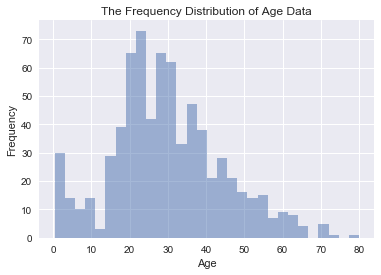

In [28]:
# Visualize the distribution of Age in dataset
titanic_df['Age'].plot.hist(alpha=0.5, bins=30, rwidth=1)
plt.title("The Frequency Distribution of Age Data")
plt.xlabel("Age")

It's obvious to see the major age group in this plot: from 20 to 30.

There're outliers in this sample since the maximum in the sample is larger than the upper bound of outlier.


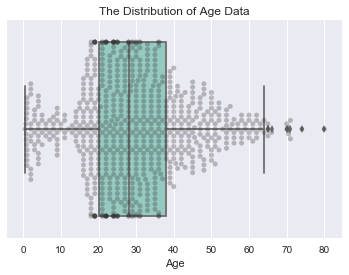

In [29]:
# See if there's any outliers in this sample data
titanic_df_iqr = titanic_df['Age'].quantile(.75) - titanic_df['Age'].quantile(.25)
titanic_df_outlier_upper = titanic_df['Age'].quantile(.75) + 1.5*titanic_df_iqr
titanic_df_outlier_lower = titanic_df['Age'].quantile(.25) - 1.5*titanic_df_iqr

if titanic_df['Age'].max() < titanic_df_outlier_upper:
    if titanic_df['Age'].min() > titanic_df_outlier_lower:
        print("There's no outlier in this sample.")
    else:
        print("There're outliers in this sample since the minimum in the sample is smaller than the lower bound of outlier.")
else:
    if titanic_df['Age'].min() < titanic_df_outlier_lower:
        print("There're outliers in this sample since the minimum in the sample is smaller than the lower bound of outlier, and the maximum in the sample is larger than the upper bound of outlier.")
    else:
        print("There're outliers in this sample since the maximum in the sample is larger than the upper bound of outlier.")

sns.boxplot(x="Age", data=titanic_df, orient="h", palette="Set3")
sns.swarmplot(x=titanic_df["Age"], color=".2", edgecolor="gray", alpha=.3)
plt.title("The Distribution of Age Data")

Outliers do exist in the dataset, and they are a few of elderly who is over 60.

In [30]:
# Exclude outliers and NaN data by vectorized operations
titanic_age_sample = titanic_df[np.abs(titanic_df['Age'] - titanic_df['Age'].mean())<=(3*titanic_df['Age'].std())]

Now we will use `titanic_age_sample` as data source to find out relationships between 'Age' and other features.

In [31]:
# Measure degree of associations by ANOVA
from scipy.stats import f

f_stats = {}
for col in titanic_age_sample.columns & ['Pclass', 'Gender', 'Embarked', 'Family_Size']:
    titanic_age_temp = titanic_age_sample.pivot_table(index=['PassengerId'], columns=col, values='Age')
    f_stats[(col,'Age')] = (get_f_stats(titanic_age_temp),f.ppf(q=1-0.05, dfn=len(titanic_age_temp.columns)-1, dfd=titanic_age_temp.notnull().values.sum()-len(titanic_age_temp.columns)))
    print("The f-stats between %s and Age is %f. " % (col, f_stats[(col,'Age')][0]) + ("It's bigger than f-critical value %f." % (f_stats[(col,'Age')][1]) if f_stats[(col,'Age')][0]>f_stats[(col,'Age')][1] else "It's smaller than f-critical value %f." % (f_stats[(col,'Age')][1])))

The f-stats between Pclass and Age is 58.166241. It's bigger than f-critical value 3.008426.
The f-stats between Gender and Age is 5.503008. It's bigger than f-critical value 3.854589.
The f-stats between Embarked and Age is 0.706100. It's smaller than f-critical value 3.008426.
The f-stats between Family_Size and Age is 11.237204. It's bigger than f-critical value 2.022569.


From these results, we can conclude that 
* The mean of ages in samples among different `Pclass` are significantly different;
* The mean of ages in samples among different `Family_Size` are significantly different, but not as significant as `Pclass` samples;
* The mean of ages in samples among different `Gender` are somewhat significantly different, but not as significant as both `Pclass` samples and `Family_Size` samples;
    * <a name="Gender-PF"></a>Well, I am curious: whether the association between `Age` and `Gender` is largely due to the connection between `Gender` and (`Pclass` and `Family_Size`), or not. To test this assumption, I will conduct *Chi-square test*: big Chi-stats can prove relations.

In [32]:
from scipy.stats import chi2
gender_pf_contingency = pd.crosstab(titanic_age_sample['Gender'], [titanic_age_sample['Pclass'], titanic_age_sample['Family_Size']], rownames=['Gender'], colnames=['Pclass', 'Family_Size'])

print("The chi-stats between 'Gender' and ('Pclass', 'Family_Size') is %f. " % (get_chi_square(gender_pf_contingency)) + ("It's bigger than chi-critical value %f." % (chi2.isf(q=0.05, df=len(gender_pf_contingency)-1)) if get_chi_square(gender_pf_contingency) > chi2.isf(q=0.05, df=len(gender_pf_contingency)-1) else "It's smaller than chi-critical value %f." % (chi2.isf(q=0.05, df=len(gender_pf_contingency)-1))))

The chi-stats between 'Gender' and ('Pclass', 'Family_Size') is 85.681340. It's bigger than chi-critical value 3.841459.


After calculating results above, I can see `Age` strong associates with `Pclass` and `Family_Size`, while the relations towards `Embarked` are not obvious. And `Gender` has a strong relationship with `Age`, because `Gender` is connected with `Pclass` and `Family_Size` together.

So I will use `Pclass` and `Family_Size` as indicators to guess missing values in `Age` feature.
* Split data by these 2 features, and combine to form groups;
* Find the mean of each group;
* Fill missing values by these means we get;

In [33]:
titanic_age_pivot = pd.pivot_table(titanic_age_sample, values='Age', index=['PassengerId'], columns=['Pclass', 'Family_Size'])

In [34]:
# Create a dict to store mean age for each specific group of (Pclass, Family_Size) 
age_pivot_pf_dict = {}
for col in titanic_age_pivot.columns:
    age_pivot_pf_dict[col] = (titanic_age_pivot.mean()[col], titanic_age_pivot.std()[col] if titanic_age_pivot.std()[col] > 0 else 0.0001)
age_pivot_pf_dict

{(1, 1): (40.547058823529412, 13.266414704193496),
 (1, 2): (37.19047619047619, 13.533539153807835),
 (1, 3): (39.5, 15.739730951791476),
 (1, 4): (17.845714285714287, 14.773623858240127),
 (1, 5): (19.5, 2.1213203435596424),
 (1, 6): (32.5, 21.110818711425349),
 (2, 1): (33.736559139784944, 12.442387099244369),
 (2, 2): (30.573529411764707, 10.316309794293499),
 (2, 3): (20.51064516129032, 16.126368869129397),
 (2, 4): (21.384615384615383, 14.390613037315108),
 (2, 5): (54.0, 0.0001),
 (2, 6): (24.0, 0.0001),
 (3, 1): (28.03125, 10.367416456911114),
 (3, 2): (23.355238095238093, 11.445316698640186),
 (3, 3): (22.039473684210527, 12.489120443219159),
 (3, 4): (12.928571428571429, 14.130872146440488),
 (3, 5): (17.0, 15.528775133372791),
 (3, 6): (14.764705882352942, 15.734235808280879),
 (3, 7): (15.166666666666666, 14.732976822781135),
 (3, 8): (15.666666666666666, 14.361986863476332)}

Now we have a mapping table for each missing `Age` value of (`Pclass`, `Family_Size`). But I need to double-check if keys in this dictionary satisfy all missing values' mapping, which means, all data have their corresponding mapping keys and values in this dictionary.

I will create a groupby object from source dataframe by (`Pclass`, `Family_Size`), and compare the dictionary with this groupby object.

In [35]:
# Split source dataframe by 'Pclass' and 'Family_Size'
df_groupby_pclass_familysize = titanic_df.groupby(['Pclass', 'Family_Size'])

In [36]:
# Discover how many missing data for 'Age' in each groupby categories
# Compare groupby categories to our mapping table
for key, value in df_groupby_pclass_familysize['Age'].agg(lambda x:x.isnull().sum()).items():
    if value != 0:
        try:
            age_pivot_pf_dict[key]
        except KeyError:
            print("%s is missing in the mapping dictionary." % str(key))

(3, 11) is missing in the mapping dictionary.


In [37]:
df_groupby_pclass_familysize.get_group((3,11)).describe()

,PassengerId,Survived,Pclass,Age,Sib_Sp,Par_Ch,Fare,Family_Size
count,7.000000,7.0,7.0,0.0,7.0,7.0,7.00,7.0
mean,481.714286,0.0,3.0,NaN,8.0,2.0,69.55,11.0
std,334.963537,0.0,0.0,NaN,0.0,0.0,0.00,0.0
min,160.000000,0.0,3.0,NaN,8.0,2.0,69.55,11.0
25%,191.500000,0.0,3.0,NaN,8.0,2.0,69.55,11.0
50%,325.000000,0.0,3.0,NaN,8.0,2.0,69.55,11.0
75%,820.000000,0.0,3.0,NaN,8.0,2.0,69.55,11.0
max,864.000000,0.0,3.0,NaN,8.0,2.0,69.55,11.0


Obviously, for passengers who live in 3rd class cabin and with family_size = 11, all age data are missing.

In [38]:
df_groupby_pclass_familysize.get_group((3,11))['Name']

159           Sage, Master. Thomas Henry
180         Sage, Miss. Constance Gladys
201                  Sage, Mr. Frederick
324             Sage, Mr. George John Jr
792              Sage, Miss. Stella Anna
846             Sage, Mr. Douglas Bullen
863    Sage, Miss. Dorothy Edith "Dolly"
Name: Name, dtype: object

We spot a bit strange in (Pclass:3, Family_Size:11) group since there's basically no data in it, and all of them have same family name: Sage. We can conclude it's a poor big Sage family with parents and children. None of them survived. R.I.P.

It's difficult to fill age data with such a family. I will remove them all from dataset.

In [39]:
# Remove Sage family in Titanic dataframe
titanic_df = titanic_df.drop(list(df_groupby_pclass_familysize.get_group((3,11)).index))

Loop each row and mapping missing `Age` values to correspongding `PassengerId`. We will use this dictionary to fill original Titanic dataframe.

In [40]:
# Fill missing values in Age based on our "Mapping" table
for index in titanic_df[titanic_df['Age'].isnull() == True]['PassengerId'].values:
    key = (titanic_df[titanic_df['PassengerId']==index]['Pclass'].values[0], titanic_df[titanic_df['PassengerId']==index]['Family_Size'].values[0])
    value = np.random.normal(age_pivot_pf_dict[key][0], 0.1*age_pivot_pf_dict[key][1])
    
    titanic_df.loc[titanic_df['PassengerId'] == index,'Age'] = value

print(titanic_df['Age'].isnull().sum())

0


In [41]:
print(titanic_df['Age'].describe())
print("\n")
print('Mode is %f'%titanic_df['Age'].mode())

count    884.000000
mean      29.587453
std       13.315119
min        0.420000
25%       21.799554
50%       28.126239
75%       36.276218
max       80.000000
Name: Age, dtype: float64


Mode is 24.000000


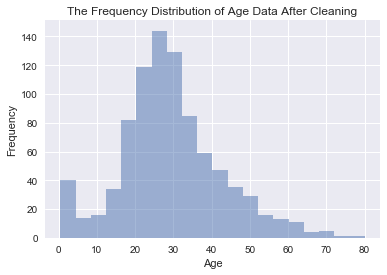

In [42]:
titanic_df['Age'].plot.hist(alpha=0.5, bins=20, rwidth=10)
plt.title("The Frequency Distribution of Age Data After Cleaning")
plt.xlabel("Age")
sns.set(font_scale = .5)

The plot is similar to the previous one. We finished data cleaning by retaining data distribution shape. No more missing value in `Age` feature. As we can see, both the mean and standard deviation of age value are smaller to previous. But the mode of age value remains the same.

### Some minor issues
In this final step in wrangling phase, I will tidy data up and eliminate unrelevant features:
1. Drop 'Ticket' column since it represents an id unique to everyone and has nothing to do with survival status;
2. Drop 'Sibsp' and 'Parch' because their informations have already included in 'Family_Size';
3. Convert float numbers to into;
3. Rearrage columns;

In [43]:
# Drop columns
titanic_df = titanic_df.drop(['Ticket', 'Sib_Sp', 'Par_Ch'], axis=1)
titanic_df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Gender          object
Age            float64
Fare           float64
Embarked        object
Family_Size      int64
Alone             bool
Title           object
dtype: object

In [44]:
def convert_int_helper(data):
    """
    Convert float to int
    """
    return int(round(data))

titanic_df['Fare'] = titanic_df['Fare'].apply(convert_int_helper)
titanic_df['Age'] = titanic_df['Age'].apply(convert_int_helper)

In [45]:
# Rearrange columns
titanic_df = titanic_df[['PassengerId', 'Survived', 'Name', 'Title', 'Gender', 'Age', 'Alone', 'Family_Size', 'Pclass', 'Fare', 'Embarked']]
titanic_df.head()

,PassengerId,Survived,Name,Title,Gender,Age,Alone,Family_Size,Pclass,Fare,Embarked
0,1,0,"Braund, Mr. Owen Harris",Mr,male,22,False,2,3,7,S
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",Mrs,female,38,False,2,1,71,C
2,3,1,"Heikkinen, Miss. Laina",Miss,female,26,True,1,3,8,S
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",Mrs,female,35,False,2,1,53,S
4,5,0,"Allen, Mr. William Henry",Mr,male,35,True,1,3,8,S


---
## EXPLORATORY PHASE
We finally come to the phsase of exploration! Let's first take a look at our data. Then we will:
* **Wandering Around**: do some exploratory works and build up an intuitive sense about relationships among features to find for later research;
* **Test for Significant With Survival Status**: with potential features at hand, visualize data distribution, and test how well these obtained sample frequencied or proportions fit expected frequencies;

In [46]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 884 entries, 0 to 890
Data columns (total 11 columns):
PassengerId    884 non-null int64
Survived       884 non-null int64
Name           884 non-null object
Title          884 non-null object
Gender         884 non-null object
Age            884 non-null int64
Alone          884 non-null bool
Family_Size    884 non-null int64
Pclass         884 non-null int64
Fare           884 non-null int64
Embarked       884 non-null object
dtypes: bool(1), int64(6), object(4)
memory usage: 76.8+ KB


In [47]:
titanic_df.describe(include=[np.number])

,PassengerId,Survived,Age,Family_Size,Pclass,Fare
count,884.000000,884.000000,884.000000,884.000000,884.000000,884.000000
mean,445.717195,0.386878,29.587104,1.832579,2.303167,31.915158
std,256.872441,0.487311,13.313125,1.401028,0.837101,49.775471
min,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000
25%,224.750000,0.000000,22.000000,1.000000,2.000000,8.000000
50%,446.500000,0.000000,28.000000,1.000000,3.000000,14.000000
75%,667.250000,1.000000,36.000000,2.000000,3.000000,30.000000
max,891.000000,1.000000,80.000000,8.000000,3.000000,512.000000


In [48]:
titanic_df.describe(include=[np.object])

,Name,Title,Gender,Embarked
count,884,884,884,884
unique,884,5,2,3
top,"Sjostedt, Mr. Ernst Adolf",Mr,male,S
freq,1,514,573,639


Then we return to the problem: **What factors made people more likely to survive?**

Before we dive into all those stats work, let's build up an intuitive sense of relationships between features, by visualizing data.

### Wandering Around
Let's find out relations among features. Here're variables we are going to explore:

|scales of measurements|variables|
|:---|:---|
|Categorical - *Nominal*|`Pclass`, `Embarked`|
|Categorical - *Dichotomous* (also part of nominal)|`Survived`, `Gender`, `Alone`|
|Numerical - *Continuous* (linear, Interval)| `Age`, `Fare`|
|Numerical - *Discrete*|`Family_Size`|

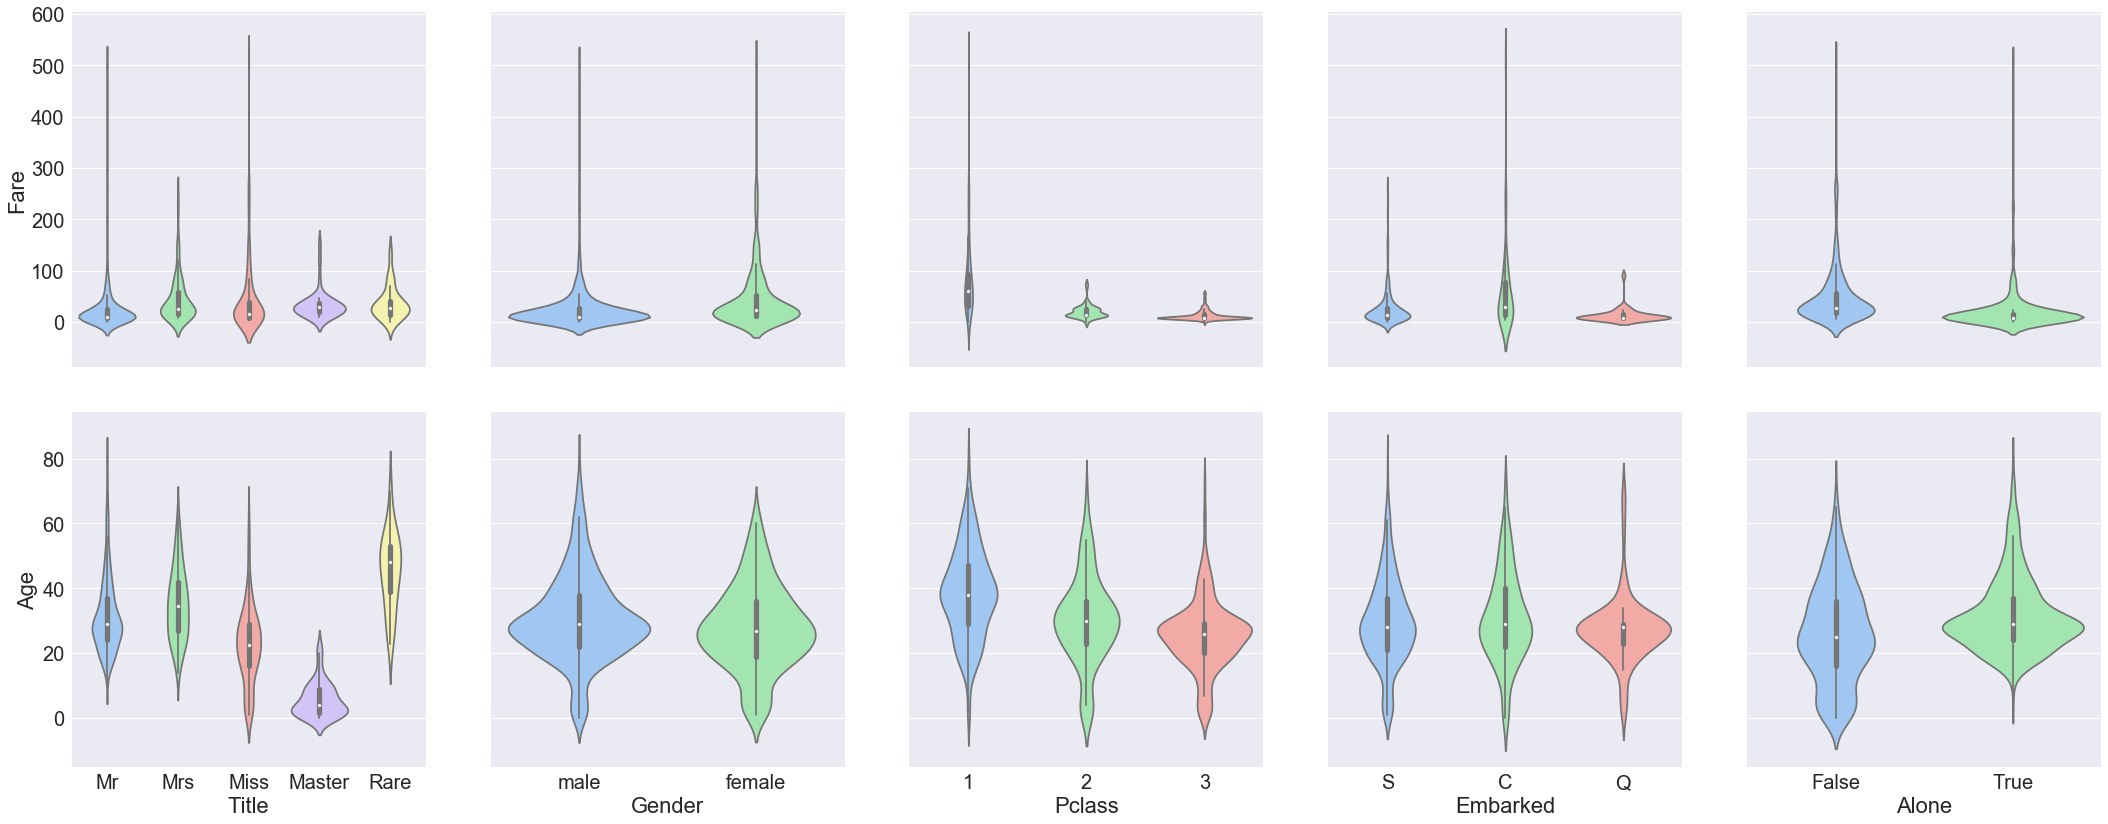

In [49]:
# Visualize distributions of data
sns.set(font_scale = 2)
g = sns.PairGrid(titanic_df,
                 x_vars=["Title", "Gender", "Pclass", "Embarked", "Alone"],
                 y_vars=["Fare", "Age"],
                 aspect=1, size=6)
g.map(sns.violinplot, palette="pastel");

* Most data of `Fare` variable cluster at the bottom of violin plot;
* While data of `Age` is distributed more normally `Fare` data (except when plot with `Title`);
* An interesting phenomenon is the person from Cherbourg who spent most money for `Fare`;

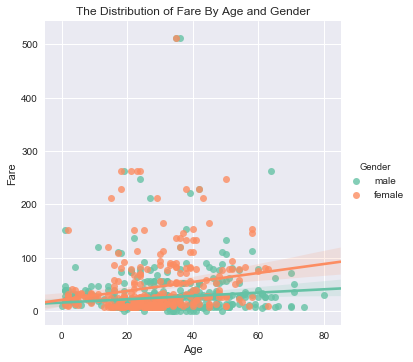

In [51]:
sns.set(font_scale = 1)
sns.lmplot(x='Age', y='Fare', hue='Gender', data=titanic_df, palette="Set2")
plt.title("The Distribution of Fare By Age and Gender")

* From the plot, we can see of greater the age of a woman is, the likihood she might spend on `Fare` increased slightly more than men did.

/Users/hj/anaconda/lib/python3.6/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


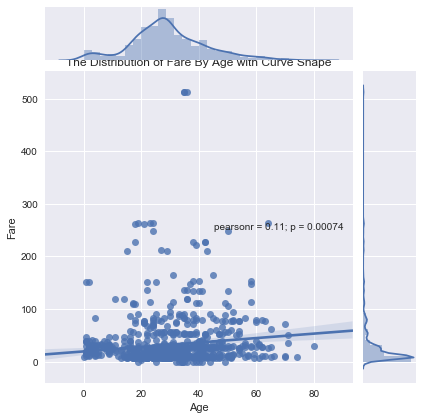

In [52]:
# Visualize data distribution of Age and Fare features
sns.jointplot(x='Age', y='Fare', data=titanic_df, kind="reg")
# sns.set(font_scale = 1)
plt.title("The Distribution of Fare By Age with Curve Shape")

* The relationship between `Age` and `Fare` is slightly positive-correlated, with pearsonr=0.11.

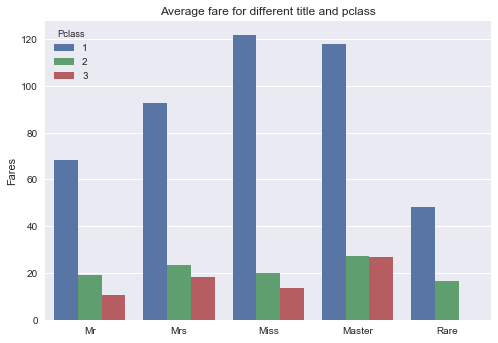

In [53]:
# Visualize age and title, pclass
ax = sns.barplot(x='Title', y='Fare', hue="Pclass", data=titanic_df, ci=None)
ax.set_title('Average fare for different title and pclass')
ax.set_ylabel('Fares')
ax.set_xlabel('')
# sns.set(font_scale = 2)

* Unsurprisingly, 1st Class takes most of `Fare` expenses.
* Peole with `Miss` or `Master` titles, spend more money than others'.

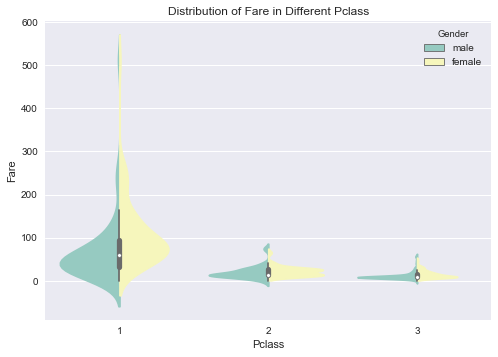

In [54]:
# Visualize the relationship between Pclass and fare
ax = sns.violinplot(x=titanic_df['Pclass'], y=titanic_df['Fare'], hue=titanic_df['Gender'], split=True, palette="Set3")
ax.set_title('Distribution of Fare in Different Pclass')
ax.set_ylabel('Fare')
ax.set_xlabel('Pclass')
# sns.set(font_scale = 0.5)

* More female passengers spend `Fare` price in range from 200 to 300.

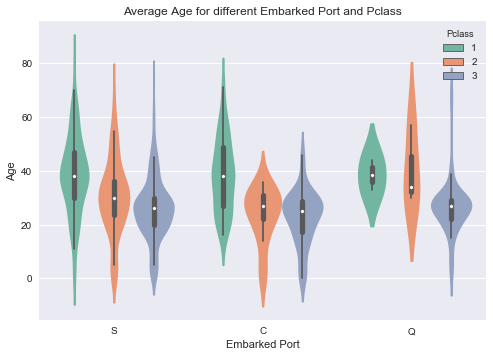

In [55]:
# Visualize embarked and age, pclass
ax = sns.violinplot(x='Embarked', y='Age', hue="Pclass", data=titanic_df, palette="Set2")
ax.set_title('Average Age for different Embarked Port and Pclass')
ax.set_ylabel('Age')
ax.set_xlabel('Embarked Port')
# sns.set(font_scale = 2)

* We can see, age range of people from Southampton are wider than Cherbourg's and Queenstown.

### Test for Significant With Survival Status
Gender, Pclass, Loneliness, Embarked, Age Group, Title are features we are focusing on.

* Groupby() and visualize
* Test for significant and effect size
* Compare with each other

We will conduct chi-square test for significant.

In [56]:
survival_features_stats = {}

#### By Gender

In [57]:
# Seperate data by Gender to see survival rate of male and female
titanic_df.groupby('Gender')['Survived'].mean()

Gender
female    0.749196
male      0.190227
Name: Survived, dtype: float64

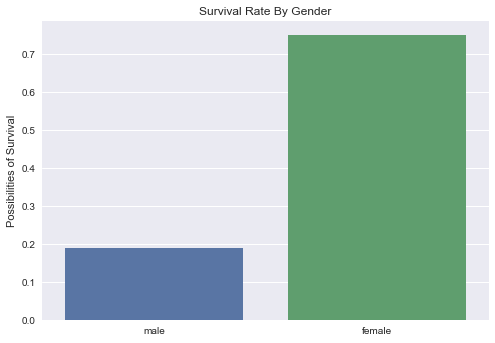

In [58]:
sns.set(style="darkgrid")

ax = sns.barplot(x='Gender', y='Survived', data=titanic_df, ci=None)
ax.set_title('Survival Rate By Gender')
ax.set_ylabel('Possibilities of Survival')
ax.set_xlabel('')

* The difference in survival rate between male and female is remarkably significant.

In [59]:
# Chi-Squared Tests
from scipy.stats import chi2_contingency, chi2
# Pclass to Survivability
pivot = pd.pivot_table(data = titanic_df[['Survived', 'Gender']], index='Survived', columns = 'Gender', aggfunc = len)
pivot

Gender,female,male
Survived,,
0,78,464
1,233,109


In [60]:
chi_2, p_value, dof, expected = chi2_contingency(pivot)
print("Results of Chi-Squared test on gender to Survival.")
print("Does gender have a significant effect on Survival?")
print("Chi-Squared Score = %f, " % (chi_2) + "it's bigger than chi-critical value %f." % (chi2.isf(q=0.05, df=dof)) \
         if chi_2 > chi2.isf(q=0.05, df=dof) \
         else "It's smaller than chi-critical value %f." % (chi2.isf(q=0.05, df=dof)))
print("P-value = %f" % (p_value))

Results of Chi-Squared test on gender to Survival.
Does gender have a significant effect on Survival?
Chi-Squared Score = 263.181265, it's bigger than chi-critical value 3.841459.
P-value = 0.000000


* **Null Hypothesis** is that Gender and Survived are independent.
* **Alternative Hypothesis** is that Gender and Survived are not independent.
* As you can see, the results are significant for all reasonable alphas.
* We can reject the Null Hypothesis

In [61]:
survival_features_stats['Gender'] = [(chi_2, chi2.isf(q=0.05, df=dof)), get_cramers_v(pivot)]

For k-1=1, Cramer’s Phi Coefficient is 0.548066.


#### By Pclass

In [62]:
# Seperate data by Pclass to see survival rate
titanic_df.groupby('Pclass')['Survived'].mean()

Pclass
1    0.629630
2    0.472826
3    0.245868
Name: Survived, dtype: float64

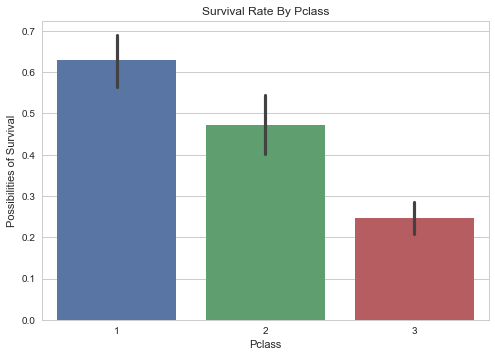

In [63]:
sns.set(style="whitegrid")

ax = sns.barplot(x=titanic_df['Pclass'], y=titanic_df['Survived'])
ax.set_title('Survival Rate By Pclass')
ax.set_ylabel('Possibilities of Survival')
ax.set_xlabel('Pclass')

* The difference in survival rate among Pclass is quite significant.

In [64]:
pivot = pd.pivot_table(data = titanic_df[['Survived', 'Pclass']], index='Survived', columns = 'Pclass', aggfunc = len)
pivot

Pclass,1,2,3
Survived,,,
0,80,97,365
1,136,87,119


In [65]:
chi_2, p_value, dof, expected = chi2_contingency(pivot)
print("Results of Chi-Squared test on Pclass to Survival.")
print("Does pclass have a significant effect on Survival?")
print("Chi-Squared Score = %f, " % (chi_2) + "it's bigger than chi-critical value %f." % (chi2.isf(q=0.05, df=dof)) \
         if chi_2 > chi2.isf(q=0.05, df=dof) \
         else "It's smaller than chi-critical value %f." % (chi2.isf(q=0.05, df=dof)))
print("P-value = %f" % (p_value))

Results of Chi-Squared test on Pclass to Survival.
Does pclass have a significant effect on Survival?
Chi-Squared Score = 99.962939, it's bigger than chi-critical value 5.991465.
P-value = 0.000000


* **Null Hypothesis** is that Pclass and Survived are independent.
* **Alternative Hypothesis** is that Pclass and Survived are not independent.
* As you can see, the results are significant for all reasonable alphas.
* We can reject the Null Hypothesis

In [66]:
survival_features_stats['Pclass'] = [(chi_2, chi2.isf(q=0.05, df=dof)), get_cramers_v(pivot)]

For k-1=1, Cramer’s Phi Coefficient is 0.336274.


#### By Title

In [67]:
# Seperate data by Title to see survival rate
titanic_df.groupby('Title')['Survived'].mean()

Title
Master    0.589744
Miss      0.714286
Mr        0.157588
Mrs       0.793651
Rare      0.347826
Name: Survived, dtype: float64

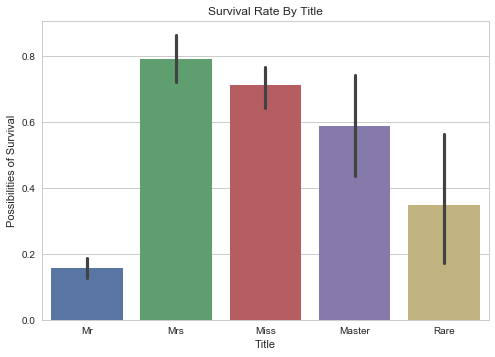

In [68]:
sns.set(style="whitegrid")

ax = sns.barplot(x=titanic_df['Title'], y=titanic_df['Survived'])
ax.set_title('Survival Rate By Title')
ax.set_ylabel('Possibilities of Survival')
ax.set_xlabel('Title')

* The survival rate of men's title is much lower than women's.

In [69]:
pivot = pd.pivot_table(data = titanic_df[['Survived', 'Title']], index='Survived', columns = 'Title', aggfunc = len)
pivot

Title,Master,Miss,Mr,Mrs,Rare
Survived,,,,,
0,16,52,433,26,15
1,23,130,81,100,8


In [70]:
chi_2, p_value, dof, expected = chi2_contingency(pivot)
print("Results of Chi-Squared test on Title to Survival.")
print("Does title have a significant effect on Survival?")
print("Chi-Squared Score = %f, " % (chi_2) + "it's bigger than chi-critical value %f." % (chi2.isf(q=0.05, df=dof)) \
         if chi_2 > chi2.isf(q=0.05, df=dof) \
         else "It's smaller than chi-critical value %f." % (chi2.isf(q=0.05, df=dof)))
print("P-value = %f" % (p_value))

Results of Chi-Squared test on Title to Survival.
Does title have a significant effect on Survival?
Chi-Squared Score = 290.979452, it's bigger than chi-critical value 9.487729.
P-value = 0.000000


It's quite significant. But does `Gender` have relationships with `Title`, since what sex you are decides what titles you are going to take?

**Let's find out any associations between `Gender` and `Title`.**

In [71]:
# Seperate data by Both Gender and Title to see survival rate
titanic_df.groupby(['Gender','Title','Survived']).apply(len)

Gender  Title   Survived
female  Miss    0            52
                1           130
        Mrs     0            26
                1           100
        Rare    1             3
male    Master  0            16
                1            23
        Mr      0           433
                1            81
        Rare    0            15
                1             5
dtype: int64

In [72]:
pivot = pd.pivot_table(data = titanic_df[['Gender', 'Title' ,'Survived']], index='Survived', columns = ['Gender', 'Title'], aggfunc = len).fillna(0)
pivot

Gender   female               male             
Title      Miss    Mrs Rare Master     Mr  Rare
Survived                                       
0          52.0   26.0  0.0   16.0  433.0  15.0
1         130.0  100.0  3.0   23.0   81.0   5.0

In [73]:
# Regardless their gender, do the difference of titles affect their survival rate
chi_2_female, p_value, dof, expected = chi2_contingency(pivot['female'])
print("Results of Chi-Squared test on different female titles to Survival.")
print("Does difference in female title have a significant effect on Survival?")
print("Chi-Squared Score = %f, " % (chi_2) + ("it's bigger than chi-critical value %f." % (chi2.isf(q=0.05, df=dof)) \
         if chi_2 > chi2.isf(q=0.05, df=dof) \
         else "It's smaller than chi-critical value %f." % (chi2.isf(q=0.05, df=dof))))
print("P-value = %f" % (p_value))
print("\n")
chi_2_male, p_value, dof, expected = chi2_contingency(pivot['male'])
print("Results of Chi-Squared test on different male titles to Survival.")
print("Does difference in male title have a significant effect on Survival?")
print("Chi-Squared Score = %f, " % (chi_2) + ("it's bigger than chi-critical value %f." % (chi2.isf(q=0.05, df=dof)) \
         if chi_2 > chi2.isf(q=0.05, df=dof) \
         else "It's smaller than chi-critical value %f." % (chi2.isf(q=0.05, df=dof))))
print("P-value = %f" % (p_value))

Results of Chi-Squared test on different female titles to Survival.
Does difference in female title have a significant effect on Survival?
Chi-Squared Score = 290.979452, it's bigger than chi-critical value 5.991465.
P-value = 0.172913


Results of Chi-Squared test on different male titles to Survival.
Does difference in male title have a significant effect on Survival?
Chi-Squared Score = 290.979452, it's bigger than chi-critical value 5.991465.
P-value = 0.000000


In [74]:
rsquared_title = 1 - (chi_2_female + chi_2_male) / chi_2
rsquared_title

0.83524765777750298

The R-squared is near 1, therefore categorizing title into male or female explains a lot about the significant between survive status and Title. So the reason `Title` feature and survived are not independent, is because `Title` is dependent to `Gender`. I will eliminate `Title`.

#### By Loneliness

In [75]:
# Seperate data by Loneliness to see survival rate
titanic_df.groupby('Alone')['Survived'].mean()

Alone
False    0.515850
True     0.303538
Name: Survived, dtype: float64

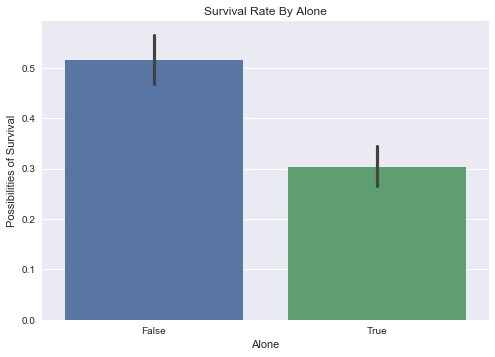

In [76]:
sns.set(style="darkgrid")

ax = sns.barplot(x=titanic_df['Alone'], y=titanic_df['Survived'])
ax.set_title('Survival Rate By Alone')
ax.set_ylabel('Possibilities of Survival')
ax.set_xlabel('Alone')

* People alone on Titanic are less likely to survive, compared with people who are not alone on the ship.

In [77]:
pivot = pd.pivot_table(data = titanic_df[['Survived', 'Alone']], index='Survived', columns = 'Alone', aggfunc = len)
pivot

Alone,False,True
Survived,,
0,168,374
1,179,163


In [78]:
chi_2, p_value, dof, expected = chi2_contingency(pivot)
print("Results of Chi-Squared test on Loneliness to Survival.")
print("Does loneliness have a significant effect on Survival?")
print("Chi-Squared Score = %f, " % (chi_2) + "it's bigger than chi-critical value %f." % (chi2.isf(q=0.05, df=dof)) \
         if chi_2 > chi2.isf(q=0.05, df=dof) \
         else "It's smaller than chi-critical value %f." % (chi2.isf(q=0.05, df=dof)))
print("P-value = %f" % (p_value))

Results of Chi-Squared test on Loneliness to Survival.
Does loneliness have a significant effect on Survival?
Chi-Squared Score = 39.167045, it's bigger than chi-critical value 3.841459.
P-value = 0.000000


* **Null Hypothesis** is that Alone and Survived are independent.
* **Alternative Hypothesis** is that Alone and Survived are not independent.
* As you can see, the results are significant for all reasonable alphas.
* We can reject the Null Hypothesis

In [79]:
survival_features_stats['Alone'] = [(chi_2, chi2.isf(q=0.05, df=dof)), get_cramers_v(pivot)]

For k-1=1, Cramer’s Phi Coefficient is 0.212870.


#### By Embarked Port

In [80]:
# Seperate data by Embarked Port to see survival rate
titanic_df.groupby('Embarked')['Survived'].mean()

Embarked
C    0.553571
Q    0.389610
S    0.342723
Name: Survived, dtype: float64

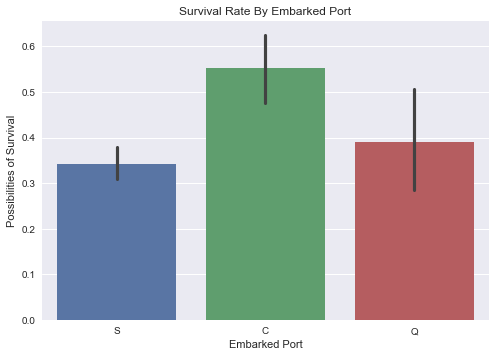

In [81]:
sns.set(style="darkgrid")

ax = sns.barplot(x=titanic_df['Embarked'], y=titanic_df['Survived'])
ax.set_title('Survival Rate By Embarked Port')
ax.set_ylabel('Possibilities of Survival')
ax.set_xlabel('Embarked Port')

* People who embarked at the Cherbourg are more likely to survive than at Southampton and at Queenstown.

In [82]:
pivot = pd.pivot_table(data = titanic_df[['Survived', 'Embarked']], index='Survived', columns = 'Embarked', aggfunc = len)
pivot

Embarked,C,Q,S
Survived,,,
0,75,47,420
1,93,30,219


In [83]:
chi_2, p_value, dof, expected = chi2_contingency(pivot)
print("Results of Chi-Squared test on Embarked Ports to Survival.")
print("Does embarked port have a significant effect on Survival?")
print("Chi-Squared Score = %f, " % (chi_2) + "it's bigger than chi-critical value %f." % (chi2.isf(q=0.05, df=dof)) \
         if chi_2 > chi2.isf(q=0.05, df=dof) \
         else "It's smaller than chi-critical value %f." % (chi2.isf(q=0.05, df=dof)))
print("P-value = %f" % (p_value))

Results of Chi-Squared test on Embarked Ports to Survival.
Does embarked port have a significant effect on Survival?
Chi-Squared Score = 24.934617, it's bigger than chi-critical value 5.991465.
P-value = 0.000004


* **Null Hypothesis** is that Embarked Port and Survived are independent.
* **Alternative Hypothesis** is that Embarked Port and Survived are not independent.
* As you can see, the results are significant for all reasonable alphas.
* We can reject the Null Hypothesis

In [84]:
survival_features_stats['Embarked'] = [(chi_2, chi2.isf(q=0.05, df=dof)), get_cramers_v(pivot)]

For k-1=1, Cramer’s Phi Coefficient is 0.167948.


#### By Age Group

In [85]:
def categorize_age(age):
    """
    categorize age data into different categories, and each category as one life stages.
    Age ranges of life stages are based on the research of American Institute For Learning and Human Development.
    """
    life_stage = {
        (0, 11): "Childhood",
        (11, 20): "Adolescence",
        (20, 35): "Early Adulthood",
        (35, 51): "Midlife",
        (51, 81): "Mature Adulthood",
        (81, 100): "Late Adulthood"
    }
    
    return [life_stage[i] for i in life_stage.keys() if (age >= i[0]) & (age < i[1])].pop()

In [86]:
# Cross tabulation of Age group and survival status
age_crosstab = pd.crosstab(titanic_df['Survived'], titanic_df['Age'].apply(categorize_age), rownames=['Survived'], colnames=['Age'])
age_crosstab

Age,Adolescence,Childhood,Early Adulthood,Mature Adulthood,Midlife
Survived,,,,,
0,65,26,293,42,116
1,41,38,156,22,85


In [87]:
# Survival rate by age group
age_crosstab.iloc[1] / (age_crosstab.iloc[0] + age_crosstab.iloc[1])

Age
Adolescence         0.386792
Childhood           0.593750
Early Adulthood     0.347439
Mature Adulthood    0.343750
Midlife             0.422886
dtype: float64

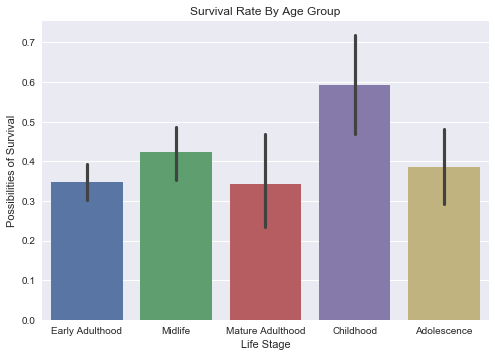

In [88]:
sns.set(style="darkgrid")

ax = sns.barplot(x=titanic_df['Age'].apply(categorize_age), y=titanic_df['Survived'])
ax.set_title('Survival Rate By Age Group')
ax.set_ylabel('Possibilities of Survival')
ax.set_xlabel('Life Stage')

* Children are significantly more likely to survive than people of other age groups.

In [89]:
chi_2, p_value, dof, expected = chi2_contingency(age_crosstab)
print("Results of Chi-Squared test on Age groups to Survival.")
print("Does difference in age have a significant effect on Survival?")
print("Chi-Squared Score = %f, " % (chi_2) + "it's bigger than chi-critical value %f." % (chi2.isf(q=0.05, df=dof)) \
         if chi_2 > chi2.isf(q=0.05, df=dof) \
         else "It's smaller than chi-critical value %f." % (chi2.isf(q=0.05, df=dof)))
print("P-value = %f" % (p_value))

Results of Chi-Squared test on Age groups to Survival.
Does difference in age have a significant effect on Survival?
Chi-Squared Score = 16.091645, it's bigger than chi-critical value 9.487729.
P-value = 0.002899


* **Null Hypothesis** is that Age and Survived are independent.
* **Alternative Hypothesis** is that Age and Survived are not independent.
* As you can see, the results are significant for all reasonable alphas.
* We can reject the Null Hypothesis

In [90]:
survival_features_stats['Age Group'] = [(chi_2, chi2.isf(q=0.05, df=dof)), get_cramers_v(age_crosstab)]

For k-1=1, Cramer’s Phi Coefficient is 0.134919.


So we can create a table of showing results and compare each other.

In [91]:
# Create a table of showing all these stats
survival_features_stats_df = pd.DataFrame(survival_features_stats, index=['(Chi-Squared, Chi-Critical)', 'Cramers V'])
survival_features_stats_df.index.name = "To Survival Status"
survival_features_stats_df

,Age Group,Alone,Embarked,Gender,Pclass
To Survival Status,,,,,
"(Chi-Squared, Chi-Critical)","(16.0916447763, 9.48772903678)","(39.1670447467, 3.84145882069)","(24.9346173875, 5.99146454711)","(263.181265292, 3.84145882069)","(99.9629391514, 5.99146454711)"
Cramers V,0.134919,0.21287,0.167948,0.548066,0.336274


We can see, `Gender` are the most significant features, and `Pclass` feature has effect on survival status as well. These two variables are the most significant here, comparing with other three features that don't show much effects on populations.

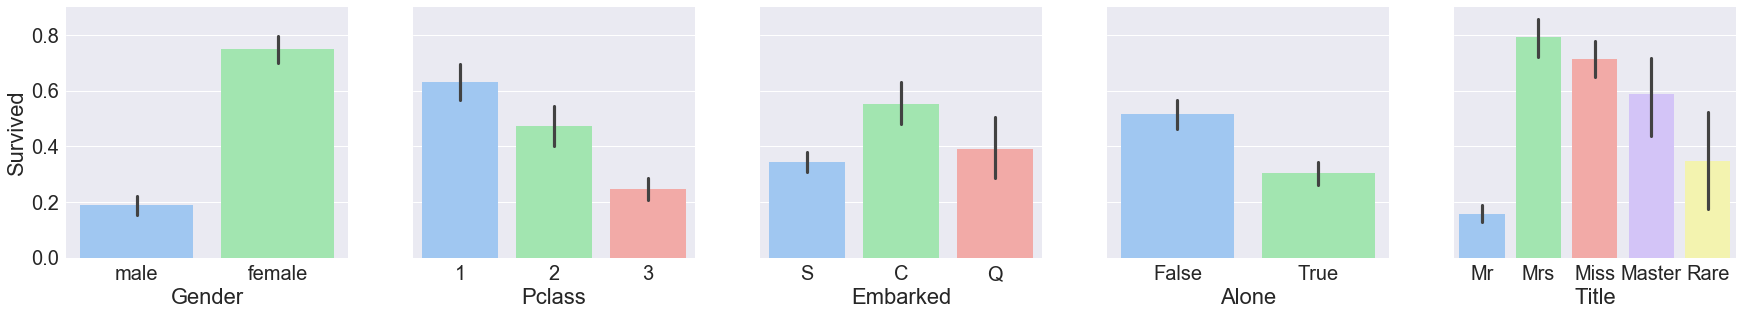

In [98]:
# Visualize survival rate by different features, and put them together
g = sns.PairGrid(titanic_df,
                 x_vars=["Gender", "Pclass", "Embarked", "Alone", "Title"],
                 y_vars=["Survived"],
                 aspect=1, size=5)
g.map(sns.barplot, palette="pastel");
sns.set(font_scale = 2)

Therefore, we can conclude that:
* **`Gender` feature are the primary factor that made people more likely to survive or not.**
* `Pclass` feature are the secondary factory that affect the likelihood of survived.

---
## CONCLUSION
Eventually, after all these steps, we come to a conclusion that address the question I prosed at the beginning of this project: "What factors made people more likely to survive?" 

> The answer, is the **`Gender`** of each passenger is THE factor made people more likely to survive.

Getting the answer is desirable, but the process to the destination are not without problems.

### Limitations of the Analysis
* I've used many Chi-squared statistic to test for significant. Though most groups' number of participants are at least 20, some may below the number.
* The dataset is filled with missing values. The method I choose to deal with is relevant to data, there are discrepancies between the data I filled and the population.
* I've used different statistic analysis to measure significance and effect size. One thing we must bear in mind: Correlation does not imply Causation. Strong assocation and "Confidence Level" do not guarantee causal relation.